In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

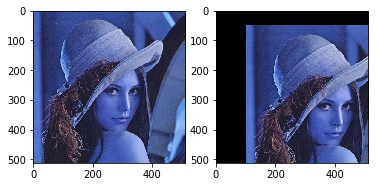

In [30]:
img = cv2.imread('lena.jpg')
M = np.float32([[1, 0, 100], [0, 1, 50]])
rows, cols = img.shape[:2]
# print(rows, cols)
# Applies an affine transformation to an image.
# cv2.warpAffine(src, M, dsize)
# M – 2 * 3 transformation matrix.
# dsize – size of the output image.
result = cv2.warpAffine(img, M, (rows, cols))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(result)

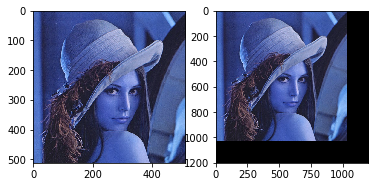

In [28]:
M = np.float32([[2, 0, 1], [0, 2, 1]]) # 变换矩阵
# rows, cols = img.shape[0] * 3, img.shape[1] * 2
# Applies an affine transformation to an image.
# cv2.warpAffine(src, M, dsize)
# M – 2 * 3 transformation matrix.
# dsize – size of the output image.
result = cv2.warpAffine(img, M, (1200, 1200))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(result)

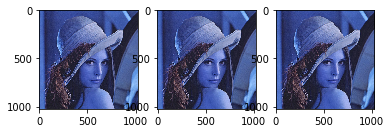

In [25]:
# Resizes an image -- cv2.resize
# cv2.resize(src, dsize)
# dsize -- output image size; 
# fx - scale factor（比例因子） along the horizontal axis
# fy - scale factor along the vertical axis
# interpolation - interpolation method（插值方法）
res1 = cv2.resize(img, (1024, 1024), interpolation=cv2.INTER_CUBIC)
res2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
height, width = img.shape[:2] # 显示行，列值
res3 = cv2.resize(img, (height*2, width*2), interpolation=cv2.INTER_CUBIC)
plt.subplot(131)
plt.imshow(res1)
plt.subplot(132)
plt.imshow(res2)
plt.subplot(133)
plt.imshow(res3)

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


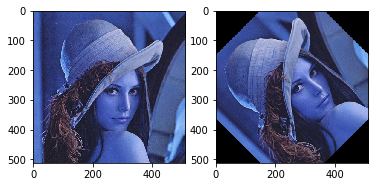

In [37]:
# Calculates an affine matrix of 2D rotation. cv2.getRotationMatrix2D
# cv2.getRotationMatrix2D(center, angle, scale) 
# center – Center of the rotation in the source image.
# angle – Rotation angle in degrees. 
# Positive values mean counter-clockwise rotation 正值表示逆时针选择
# (the coordinate origin is assumed to be the top-left corner).
# scale – Isotropic scale factor.
M1 = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
print(M1)
res4 = cv2.warpAffine(img, M1, (rows, cols))

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(res4)

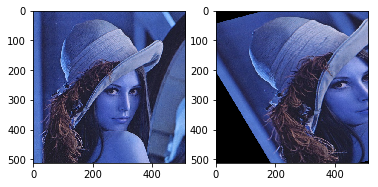

In [38]:
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])
# Calculates an affine transform from three pairs of the corresponding points.
# cv2.getAffineTransform(src, dst) 
# src – Coordinates of triangle vertices in the source image.
# dst – Coordinates of the corresponding triangle vertices in the destination image.
M2 = cv2.getAffineTransform(pts1, pts2)
res5 = cv2.warpAffine(img, M2, (rows, cols))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(res5)

[[ 1.34396625e+00  2.18785204e-01 -8.94831484e+01]
 [ 1.07950336e-01  1.51130471e+00 -1.04280025e+02]
 [ 6.31176482e-04  1.12631248e-03  1.00000000e+00]]


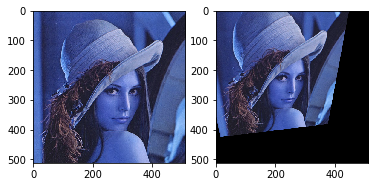

In [42]:
# img = cv2.imread('lena.jpg')
rows,cols = img.shape[:2]
pts1 = np.float32([[56,65],[238,52],[28,237],[239,240]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])
# Calculates a perspective transform from four pairs of the corresponding points.
# cv2.getPerspectiveTransform(src, dst) 
# src – Coordinates of quadrangle vertices in the source image.
# dst – Coordinates of the corresponding quadrangle vertices in the destination image.
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
# Applies a perspective transformation to an image.  cv2.warpPerspective
# cv2.warpPerspective(src, M, dsize) 同cv2.warpAffine(src, M, dsize)
res = cv2.warpPerspective(img,M,(rows,cols))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res)